**Problématique : quels sont les déterminants du salaire en NBA sur les 25 dernières années ?**

L'objectif de l'étude menée dans le cadre de la matière *Python pour la Data Science** a été d'identifier les déterminants du salaire en NBA avec les données des 25 dernières années. Plus particulièrement, les salaires en NBA sont critiqués car parfois trop élevés, ou même trop faibles en fonction des cas. On va donc chercher à voir si les performances sur le terrain des joueurs ont un impact significatif sur l'évolution de leur salaire ou cours de leur carrière.

Pour cela, nous avons utilisé la bibliothèque *nba_api*, développé par la NBA afin de récupérer toutes les données sur les joueurs / équipes pour les 25 dernières saisons. On a également développé un outil de scraping via selenium pour récupérer les salaires des joueurs pour chaque saison, ainsi que les différents titres qu'ils ont pu avoir (MVP sur une saison par exemple).

Commençons par importer et aggréger toutes ces données dans une même base de données (fichier .csv) :

In [2]:
import pandas as pd

# Chargement de la base de données contenant les infos + performances des joueurs

df = pd.read_csv('./data/merged_data.csv')

print(f"Dataset chargé: {len(df)} lignes, {len(df.columns)} colonnes")

Dataset chargé: 10285 lignes, 78 colonnes


# 1 - Statistiques Descriptives
## Données utilisées

Nous avons construit la base de données "NBA_Stats"

Elle présente de nombreuses variables d’intérêt pour notre étude :  
  
**adjusted_salary :** *Salaire brut sur une saison, ajusté pour permettre la comparaison entre les différentes saisons*  
**PTS :** *Nombre de points inscrits par match en moyenne sur une saison régulière de 82 matchs*  
**REB :** *Nombre de rebonds captés par match en moyenne sur une saison régulière de 82 matchs*  
**AST :** *Nombre de passes décisives effectuées par match en moyenne sur une saison régulière de 82 matchs*  
**STL :** *Nombre d'interceptions effectuées par match en moyenne sur une saison régulière de 82 matchs*  
**BLK :** *Nombre de tirs contrés par match en moyenne sur une saison régulière de 82 matchs*  
**PLUS_MINUS :** *Différence entre les points inscrits et encaissés par l'équipe lorsque le joueur est présent sur le terrain, en moyenne sur une saison régulière de 82 matchs*  
**NBA_FANTASY_PTS :** *Points attribués aux performances des joueurs, sur une plateforme permettant de faire un concours de pronostic durant la saison*  
  
**XXX_RANK :** *Classement d'un joueur sur une saison régulière dans la catégorie statistique XXX (PTS, REB, AST, STL, BLK)*  

**YOE :** *Nombre d'années passées à jouer dans la ligue (Ancienneté)* 

Les salaires des joueurs reposent-ils uniquement sur leur performances sur le terrain? 
Regardons l'évolution des 5 statistiques principalement regardées (par le grand public) en NBA, ainsi que le temps de jeu.

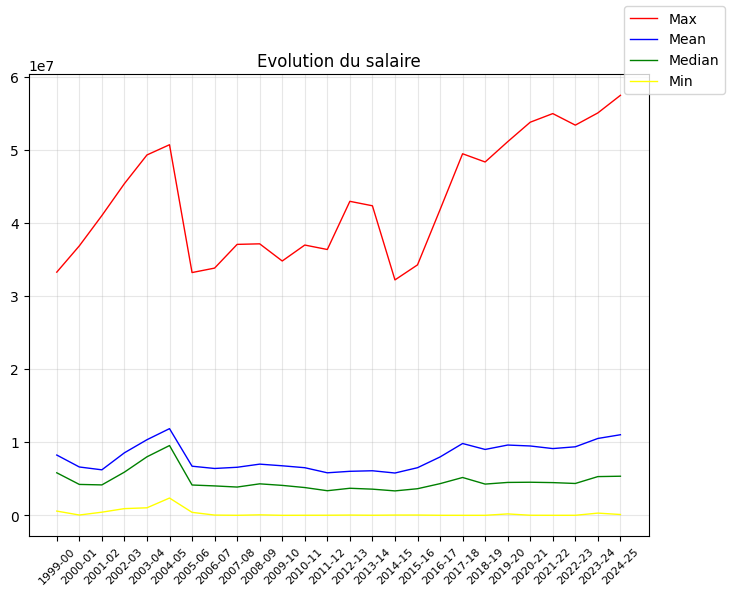

In [3]:
from plot_func import plot_stat
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,1, figsize=(8, 6))

plot_stat('adjusted_salary', axes , df)
axes.set_title(f'Evolution du salaire')

fig.legend()
plt.show()

### Evolution des 5 statistiques majeures (PTS, REB, AST, STL, BLK)

In [4]:
df['total_minutes'] =  df['MIN'] * df['GP']
time_played_season = df.groupby('Season')['total_minutes']    # Nombre de minutes jouées par saison en moyenne

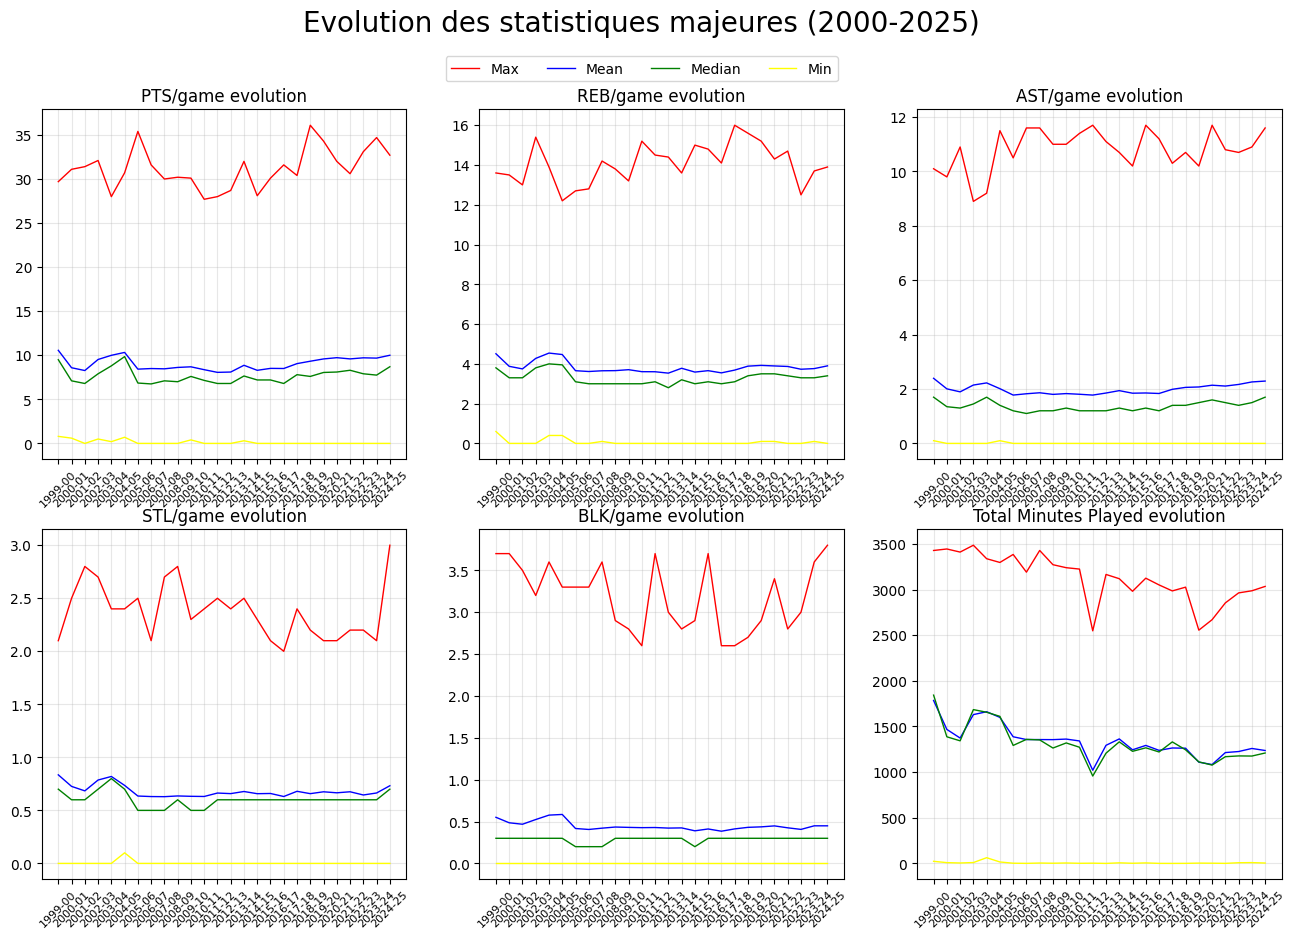

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Evolution des statistiques majeures (2000-2025)', fontsize=20)
labels = []
labels.extend(['Max', 'Mean', 'Median', 'Min'])
plot_stat('PTS', axes[0,0])


plot_stat('REB', axes[0,1])
plot_stat('AST', axes[0,2])
plot_stat('STL', axes[1,0])
plot_stat('BLK', axes[1,1])
plot_stat('total_minutes', axes[1,2] , df)
axes[1,2].set_title(f'Total Minutes Played evolution')

fig.legend(labels, loc='upper center', bbox_to_anchor=(0.5, 0.94), ncol=4)
plt.show()

On n'observe pas d'augmentation massive d'aucune des 5 statistiques principales qui semble pouvoir totalement expliqué la hausse des salaires. On peut aussi penser que les joueurs jouent plus et que c'est pour cela qu'ils sont mieux payés qu'avant. Mais la encore aucune évolution notable du temps de jeu, il semble même plutôt diminuer.  
La diminution soudaine des minutes totales jouées en 2011-2012, s'explique par le lockout (~ grève des joueurs),du 1er juillet au 8 décembre 2011, qui a amputé cette saison de ses 16 premiers matchs.

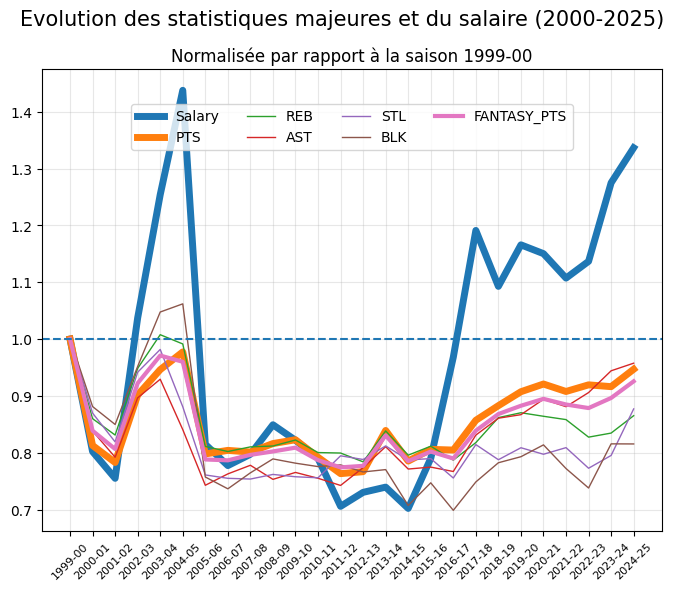

In [6]:
from plot_func import stat_norm

plt.figure(figsize=(8, 6))
plt.suptitle('Evolution des statistiques majeures et du salaire (2000-2025)', fontsize=15)

plt.plot(stat_norm('adjusted_salary'),linewidth = 5, label= 'Salary')
plt.plot(stat_norm('PTS'),linewidth = 5, label= 'PTS')

plt.plot(stat_norm('REB'),linewidth = 1, label= 'REB')
plt.plot(stat_norm('AST'),linewidth = 1, label= 'AST')
plt.plot(stat_norm('STL'),linewidth = 1, label= 'STL')
plt.plot(stat_norm('BLK'),linewidth = 1, label= 'BLK')

plt.plot(stat_norm('NBA_FANTASY_PTS'),linewidth = 3, label= 'FANTASY_PTS')
plt.axhline(y=1,linestyle = '--')

plt.grid(True, alpha=0.3)
plt.title("Normalisée par rapport à la saison 1999-00")
plt.legend( loc='upper center', bbox_to_anchor=(0.5, 0.94), ncol=4)
plt.tick_params(axis='x', rotation=45, labelsize='8')
plt.show()

ATTENTION : Le boom des salaires et des performances autour de 2004 provient probablement d'un problème de données, en effet on possède un nombre faible de joueurs pour les saisons de 2002-03 à 2004-05, on peut rationnellement penser que les informations disponibles concernent les meilleurs joueurs, donc ceux qui font les meilleures performances et qui sont le mieux payés.
Hormis cette "explosion", le salaire comme les performances moyennes restent à peu près stable du début des années 2000 à 2015.
A partir de 2016 on observe une augmentaion du salaire moyen et des performances moyennes mais proportionnelement moins importante que l'augmentation du salaire. On observe aussi une augmentation des performances mais à une échelle plus réduite. 

### Evolution des salaires en fonctions des performances

In [7]:
from plot_func import plot_desc_salary_cont
from plot_func import plot_desc_salary

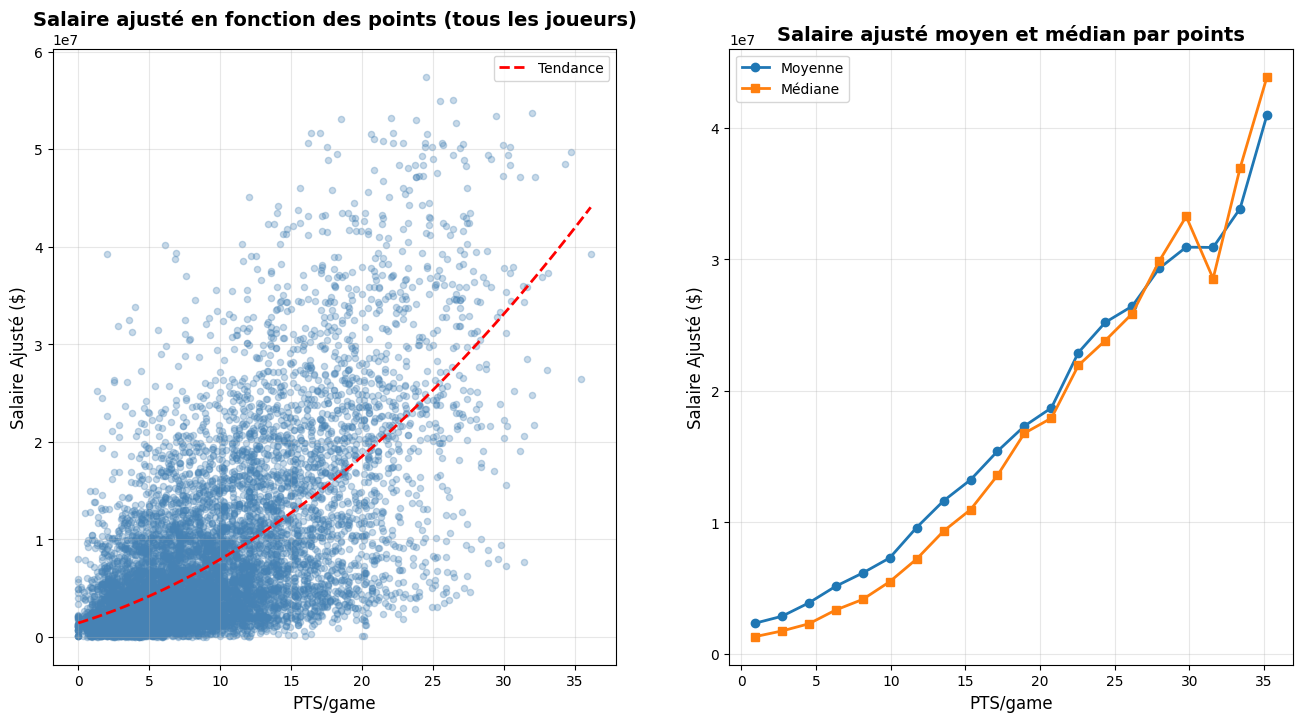

In [8]:
plot_desc_salary_cont('PTS' , 'points' , nb_inter = 20)

Comme notre intuition laissait à penser, les salaires évoluent positivement en fonction des points inscrits. Cette évolution n'est pas constante, en passant la barre des 25 points par match, les salaires évoluent encore plus fortement pour chaque points supplémentaires inscrits par match. Le graphique de droite semble montrer qu'inscire un 31eme points par match a un effet négatif sur le salaire médian, ce qui ne semble pas cohérent, mais qui peut être expliqué par le faible nombre de joueurs à plus de 30 points par match.  

Cependant le nuage de points présente une dispersion importante, alors malgré une tendance claire, estimer le salaire d'un joueur uniquement à partir des points inscrits semble impossible.  

On cherche alors une variable qui tienne compte de plus de paramètres que simplement les points inscrits. On utilise alors un proxy de la performance globale : NBA_FANTASY_PTS. Cette variable attribue des "fantasy points" à chaque action positive effectué par un joueur (dans la version actuelle): 1 pour chaque point (réels) inscrit, 1 pour chaque rebond, 2 par passe décisive, 3 par contre et enfin 3 par interception

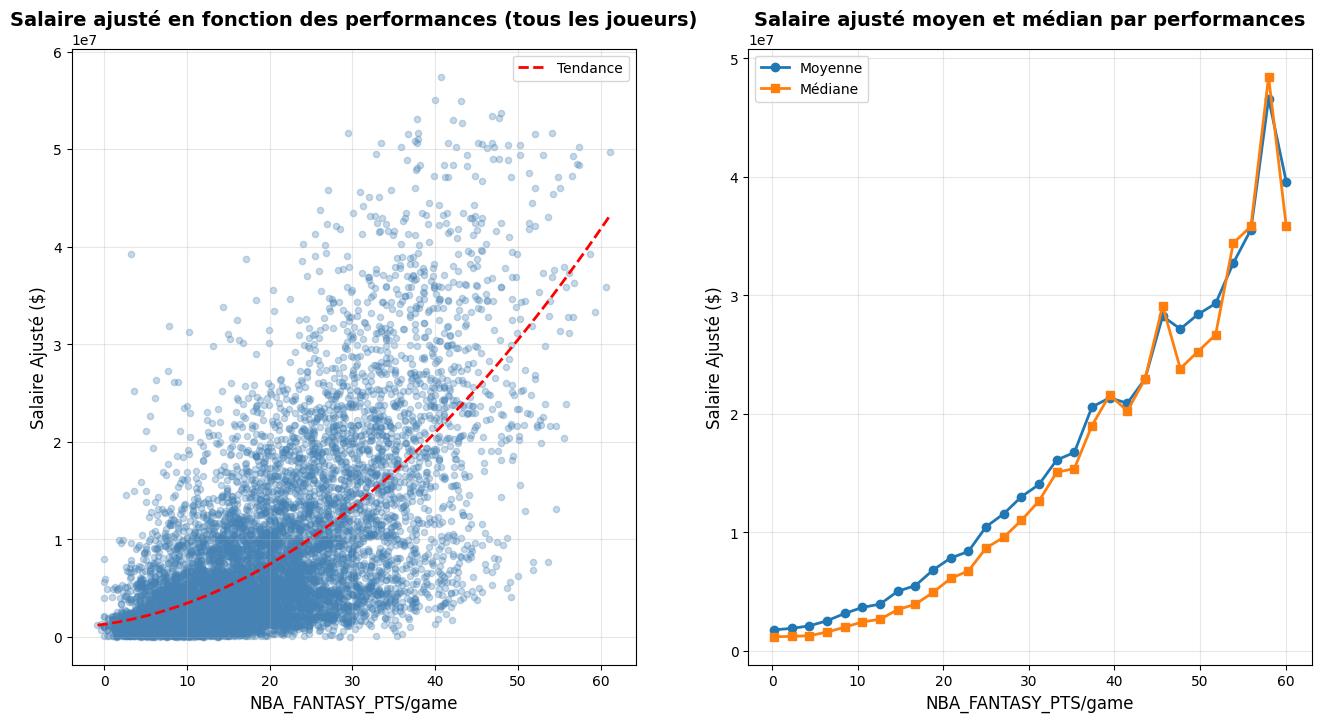

In [9]:
plot_desc_salary_cont('NBA_FANTASY_PTS' , 'performances', nb_inter = 30)

### Evolution des performances en fonction de l'exprérience

Dans la grande majorité des domaines on observe une corrélation entre expérience et rémunération, car on apprends le métier au cours des années et on devient alors plus performants. Cela ne semble pas aussi simple dans le sport de haut niveau, car le corps fatigue avec les années. 

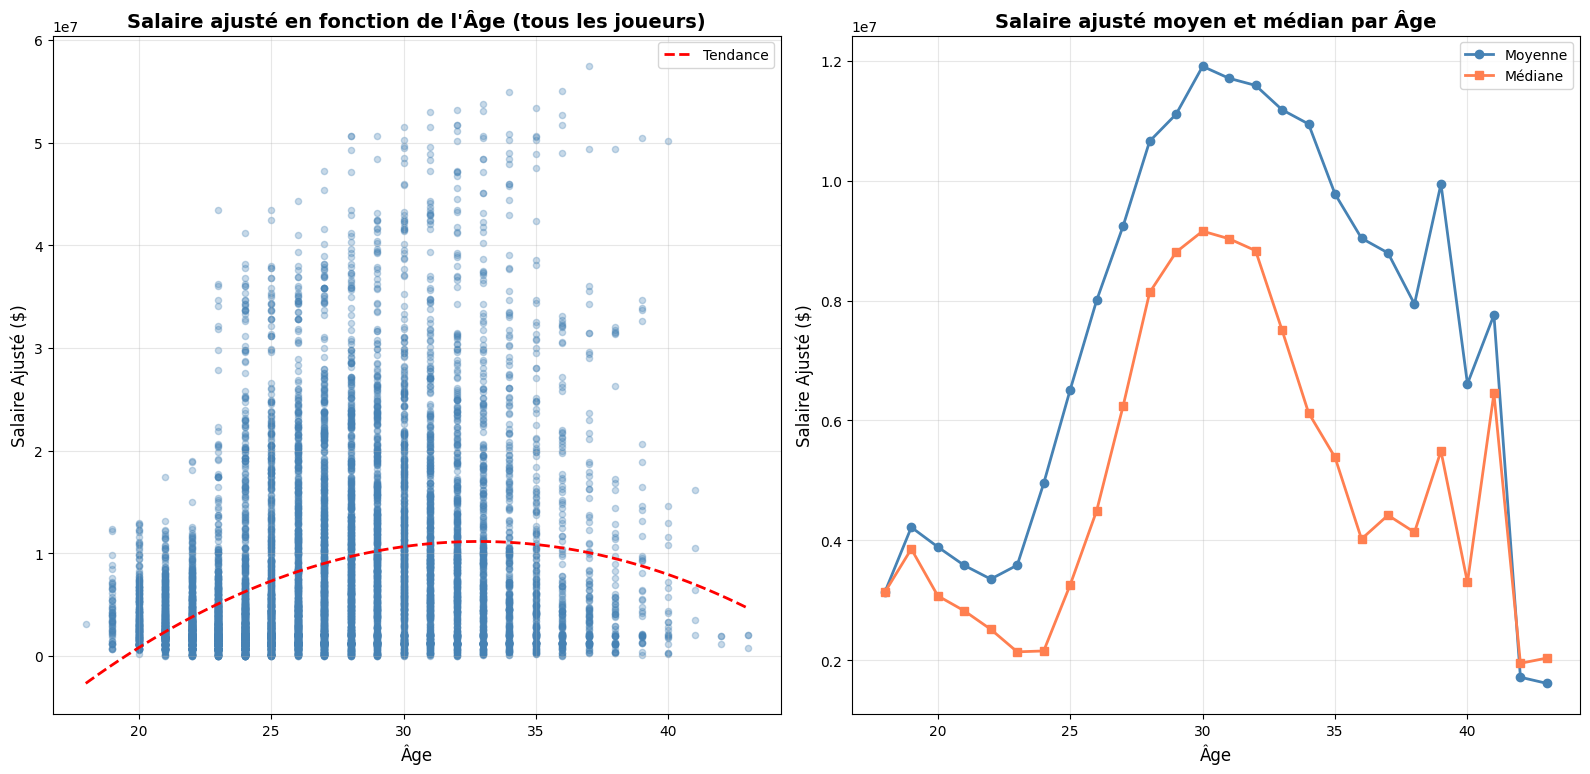

In [10]:
plot_desc_salary('AGE' , 'Âge')

On observe que les salaires moyens et médians sont maximaux à 30 ans. On pourrait s'attendre plutôt à atteindre ce pic un peu plus tôt dans la carrière d'un joueur, qui devrait commencer à décliner vers cet âge, cependant on a probablement un biais de sélection dans notre cas. En effet si un joueur est encore présent à 30 ans dans la ligue c'est certainement qu'il est performant, sinon il aurait déjà été congédié au cours des années précédentes. Ainsi, puisqu'il reste les excellent joueurs, extrêmement payés, les salaires sont tirés vers le haut. L'augmentation de la différence entre salaire moyen et médian passé 30 ans (Graph. 2) confirme ce point de vue. 

La variance forte des salaires pour les plus vieux joueurs (passé 35 ans) s'explique par la présence de 2 profils : les meilleurs joueurs qui continuent et sont grassement payés, et les vétérans payés faiblement pour donner des conseils aux jeunes plutôt que pour vraiment beaucoup jouer.  

D'autre par les salaires plus élevés pour les très jeunes (18-19ans) que pour les jeunes (~22ans), traduit d'un autre biais de sélection, en effet les seuls joueurs aussi jeunes à se présenter à la Draft (Choix des nouveaux joueurs dans la ligue) et à être sélectionnés sont souvent des talents générationnels qui ne passent pas ou peu par l'université (par exemple, LeBron James, Kobe Bryant ou plus récemment Victor Wembanyama et Cooper Flag).  

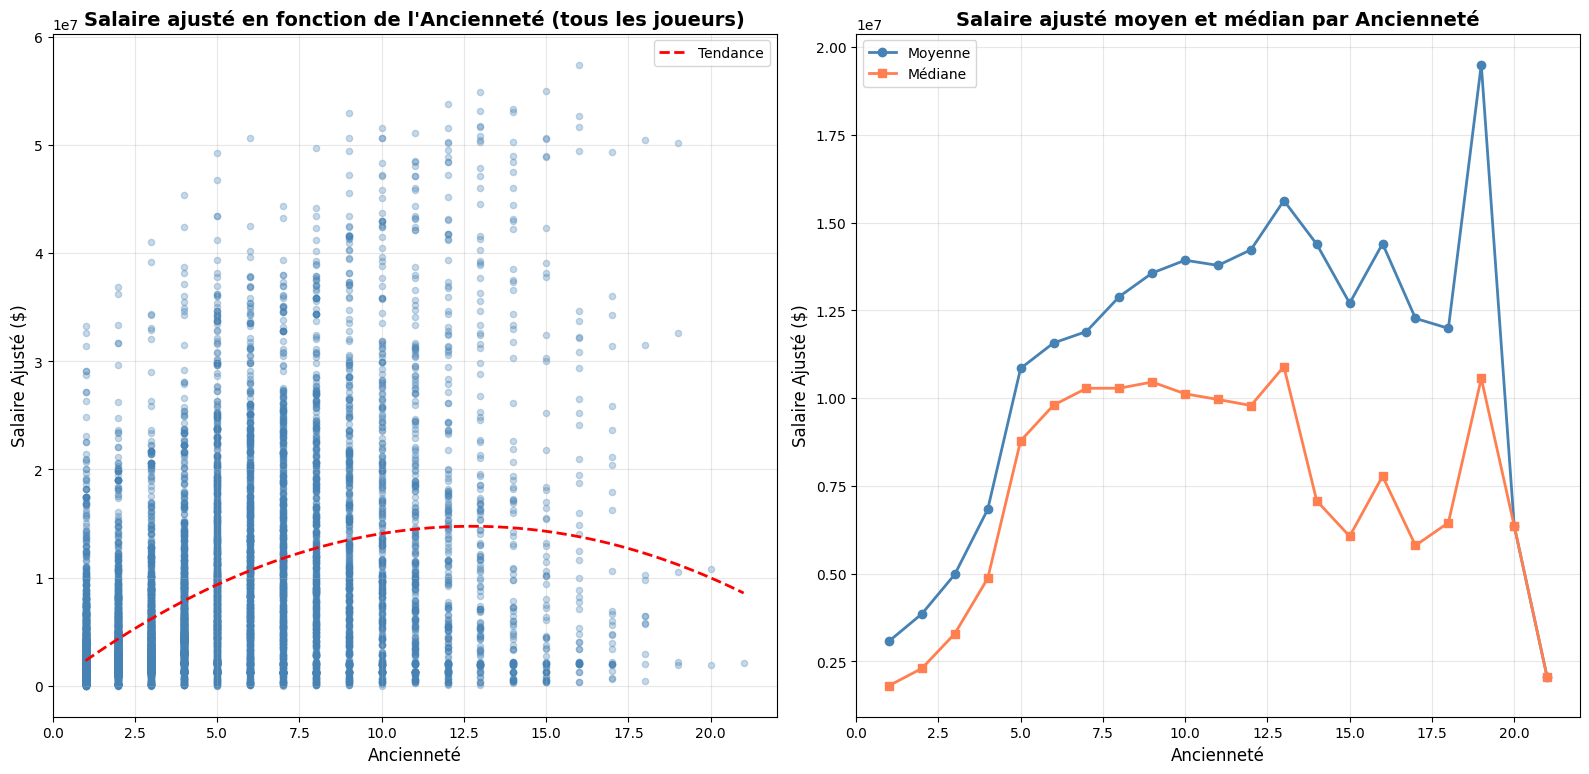

In [11]:
plot_desc_salary('YOE' , 'Ancienneté')

Pour ne tenir compte que de l'expérience, sans différencier l'age d'arrivée dans la ligue, on utilise la variable YOE (nombre d'années dans la ligue) qui indique l'ancienneté. On trouve des représentations similaires aux graphiques précédents, sans le problème concernant les plus jeunes.

### Salaire par poste occupé

La valeur des joueurs varie-t-elle de manière importante selon la position à laquelle ils évoluent ?  
Pour faire le parallèle avec d'autres sport, ils sembleraient que ce soit le cas au football ou au rugby. Les buteurs au football, peut-être car inscrire des buts est plus souvent mis en avant que défendre, et les demi-d'ouverture (10) peut-être car il occupe un poste très différents des autres, sont en moyennes mieux payés que les autres. Mais est-ce aussi le cas en NBA, où tous les joueurs jouent des 2 cotés du terrain? 

C:\Users\lunat\AppData\Local\Temp\ipykernel_4996\3428175404.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_salary, y='Position', x='adjusted_salary', order=positions_order, palette='Set2')


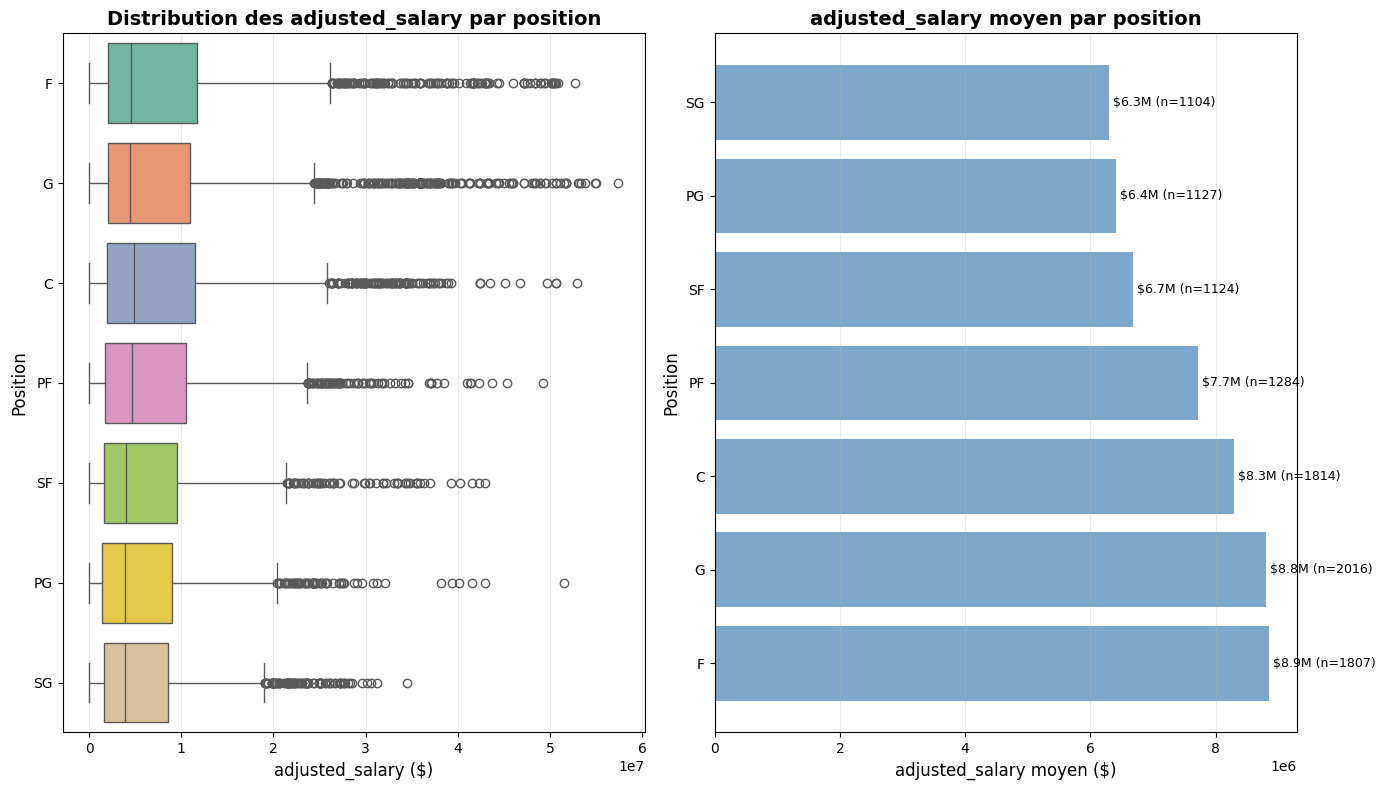


Résumé des salaires par position:
Position  mean_millions  median_millions  count
       F       8.853508         4.566910   1807
       G       8.806932         4.421021   2016
       C       8.300395         4.867920   1814
      PF       7.721727         4.649940   1284
      SF       6.674962         3.963011   1124
      PG       6.406908         3.878577   1127
      SG       6.303262         3.877799   1104


In [13]:
import seaborn as sns

# Graphique du salaire moyen par position
plt.figure(figsize=(14, 8))

# Vérifier si la colonne Position existe
if 'Position' in df.columns:
    # Filtrer les données avec salaire non nul et exclure la position 'GF'
    df_with_salary = df[(df['adjusted_salary'].notna()) & 
                                 (df['adjusted_salary'] > 0) & 
                                 (df['Position'] != 'GF')]
    
    # Calculer le salaire moyen par position
    salary_by_position = df_with_salary.groupby('Position')['adjusted_salary'].agg(['mean', 'median', 'count']).reset_index()
    salary_by_position = salary_by_position.sort_values('mean', ascending=False)
    
    # Créer un boxplot pour montrer la distribution
    plt.subplot(1, 2, 1)
    positions_order = salary_by_position['Position'].tolist()
    sns.boxplot(data=df_with_salary, y='Position', x='adjusted_salary', order=positions_order, palette='Set2')
    plt.title('Distribution des adjusted_salary par position', fontsize=14, fontweight='bold')
    plt.xlabel('adjusted_salary ($)', fontsize=12)
    plt.ylabel('Position', fontsize=12)
    plt.grid(True, alpha=0.3, axis='x')
    
    # Créer un graphique en barres pour le salaire moyen
    plt.subplot(1, 2, 2)
    bars = plt.barh(salary_by_position['Position'], salary_by_position['mean'], color='steelblue', alpha=0.7)
    plt.title('adjusted_salary moyen par position', fontsize=14, fontweight='bold')
    plt.xlabel('adjusted_salary moyen ($)', fontsize=12)
    plt.ylabel('Position', fontsize=12)
    plt.grid(True, alpha=0.3, axis='x')
    
    # Ajouter les valeurs sur les barres
    for i, (pos, val, count) in enumerate(zip(salary_by_position['Position'], 
                                                salary_by_position['mean'], 
                                                salary_by_position['count'])):
        plt.text(val, i, f' ${val/1e6:.1f}M (n={count})', 
                va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Afficher le tableau récapitulatif
    print("\nRésumé des salaires par position:")
    print("="*80)
    salary_by_position['mean_millions'] = salary_by_position['mean'] / 1e6
    salary_by_position['median_millions'] = salary_by_position['median'] / 1e6
    print(salary_by_position[['Position', 'mean_millions', 'median_millions', 'count']].to_string(index=False))
    
else:
    print("La colonne 'Position' n'existe pas dans le dataset.")
    print(f"Colonnes disponibles: {df.columns.tolist()}")

PG = Meneur , SG = Arrière , G = Meneur et Arrière  
SF = Ailier , PF = Ailier Fort , F = Ailier et Ailier Fort  
C = Pivot

Il ne semble pas y avoir de différences une fois que l'on regroupe (PG, SG, G) et (SF, PF, F).
Cependant les joueurs dont la position est F ou G, sont mieux payés en moyenne, cela s'explique par leur polyvalence, ils peuvent occuper deux postes différents à un niveau très élevé. Cela concerne généralement les très bons joueurs qui sont très bien payés, les joueurs moins performants ont déjà peu de temps de jeu sur un poste unique. On ne les voient donc pas vraiment évolué dans une autre position, ainsi ils ne sont pas catégorisé comme F ou G. 

### Salaire par franchise

Certaines franchises payent mieux que d'autres ?  
On peut imaginer que certaines franchises disposent de moyens financier plus important que d'autres, notamment les équipes des "grands marchés" (les grandes zones métropolitaines américaines) comme Los Angeles, New York ou Philadelphie par exemple. En effet elles peuvent vendre le produit que représente le basket-ball à un plus grand nombre, elles ont donc intéret à attirer les meilleurs joueurs et être compétitifs pour vendre plus cher les billets au stade et le merchandising, etc...  
La mise en place de "Salary Cap" (Masse salariale à ne pas dépasser) depuis 1984, ou de "Luxury Tax" (Taxes très lourdes en cas de dépassement de certains paliers du salary cap), tentent de lutter contre la différence d'attraction des équipes. Mais restent ils tout de même des différences de moyen important? 

) missing from font(s) DejaVu Sans.pykernel_4996\2406102534.py:27: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) DejaVu Sans.on\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


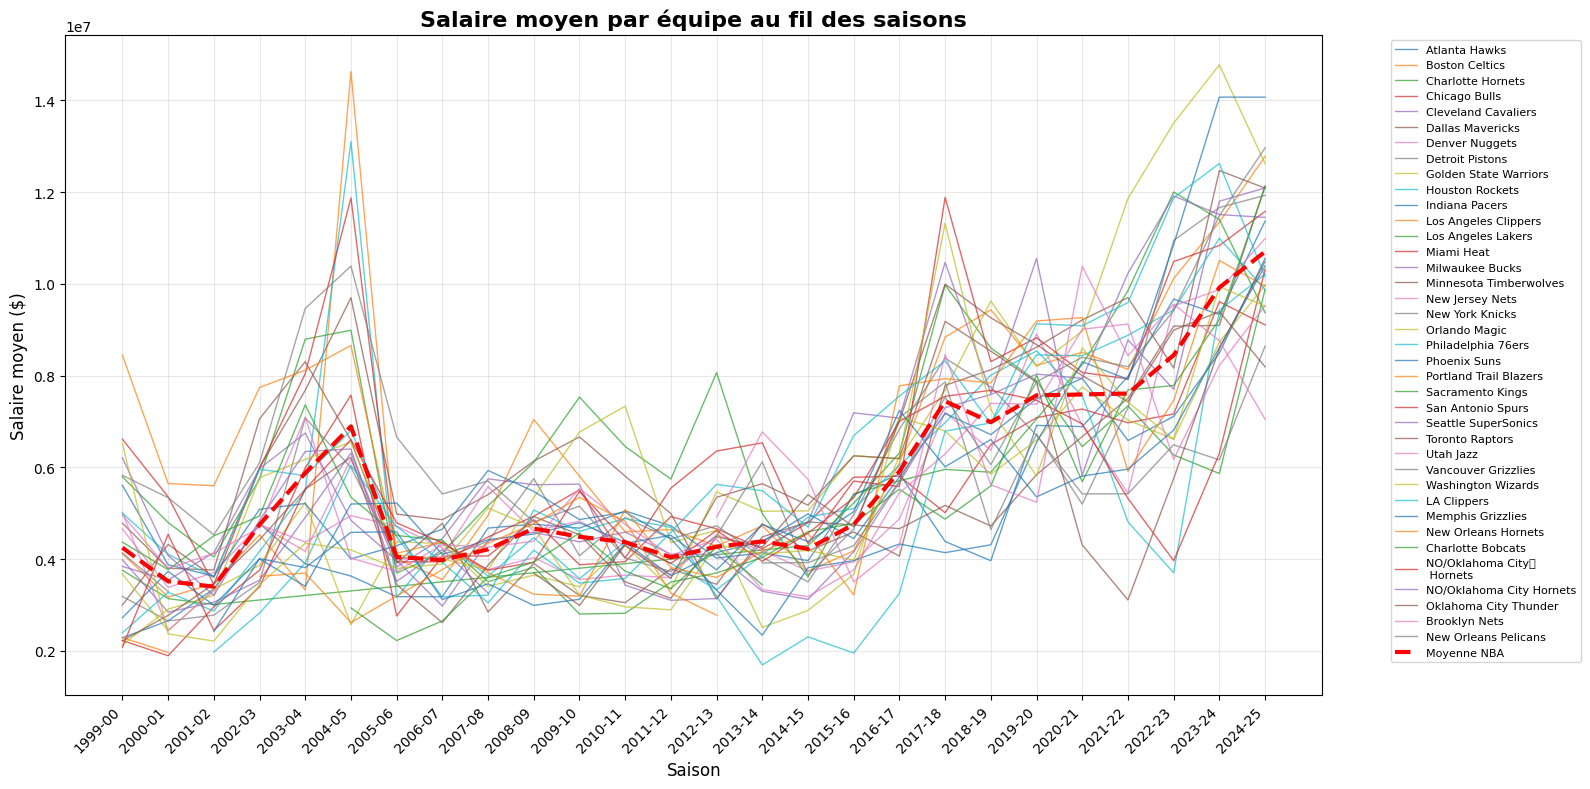

In [14]:
# Calcul du salaire moyen par équipe par an
salary_by_team_year = df.groupby(['Season', 'Team'])['Salary'].mean().reset_index()
salary_by_team_year.columns = ['Season', 'Team', 'Average_Salary']

# Calcul du salaire moyen global par saison (toutes équipes confondues)
salary_avg_global = df.groupby('Season')['Salary'].mean().reset_index()
salary_avg_global.columns = ['Season', 'Average_Salary']

# Création du graphique
plt.figure(figsize=(16, 8))

# Tracer une ligne pour chaque équipe
for team in salary_by_team_year['Team'].unique():
    team_data = salary_by_team_year[salary_by_team_year['Team'] == team]
    plt.plot(team_data['Season'], team_data['Average_Salary'], label=team, alpha=0.7, linewidth=1)

# Tracer la moyenne globale en mise en valeur
plt.plot(salary_avg_global['Season'], salary_avg_global['Average_Salary'], 
         color='red', linewidth=3, label='Moyenne NBA', linestyle='--', zorder=10)

plt.title('Salaire moyen par équipe au fil des saisons', fontsize=16, fontweight='bold')
plt.xlabel('Saison', fontsize=12)
plt.ylabel('Salaire moyen ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Il ne semble pas qu'une équipe reste tout au long de la période parmi les équipes avec le salaire moyen le plus élevé. Sur plusieurs années, cela est possible comme pour les Phoenix Suns depuis le début de la décennie 2020, mais ces derniers n'étaient pas parmi les plus gros offreurs une dizaine d'années auparavant. Cela s'explique par des cycles d'arrivées et de départs de joueurs stars. Dans le cas de Phoenix, ils disposent ces dernières années d'un des meilleurs joueurs offensifs de la ligue en la personne de Devin Booker. Il est alors fortement payé, et les ambitions de la franchise ont été revues à la hausse depuis son arrivée. En conséquence, elle investit sur d'autres joueurs très forts et donc très chers, dans l'objectif de gagner un titre. Cependant cela s'accompagne de taxes très importantes pour avoir enfreint les règles de fair-play financier, et donc, ce n'est pas soutenable à long terme.

# 2 - Nettoyage et pre-processing de la BDD

Grâce au scraping mis en place, on récupère un jeu de données assez conséquant (10k+ données et presque 80 colonnes). Afin de réduire le volume de données à traîter pour accélérer le temps de calcul des modèles sans perdre trop d'information, on peut commencer par supprimer les données très corrélées (>= à 80% en valeur absolue). Commençons d'abord par calculer le nombre de paires de variables qui sont largement corrélées :

In [ ]:
from clean_dataset_fun import analyze_correlations

# Analyse des corrélations élevées (>= 80%)

correlations_list = analyze_correlations(df, threshold=0.80, verbose=True)

On remarque qu'il y a 172 paires de variables qui sont extrêmement corrélées. On va donc supprimer une partie de ces variables qui portent vraissemblablement la même information que les autres. 
On conserve également toutes les métriques de perforomance des joueurs sur le terrain, car on veut mesurer l'impact de la performance sur le terrain des joueurs sur l'évolution de leur salaire.

In [ ]:
from clean_dataset_fun import remove_highly_correlated_features

# Liste des variables de performance à protéger lors de la suppression des colonnes corrélées, 
# car on veut mesurer l'impact de la performance sur le terrain des joueurs sur l'évolution de leur salaire
# On ne garde pas forcement les Fantasy Points, car bien que corrélés à la performance, elles ne permettent 
# pas de différencier les types de performance (scoring, rebonds, passes, etc.)
performance_vars = [

    # Temps de jeu et résultats d'équipe
    "GP", "W", "L", "W_PCT", "MIN", 
    
    # Scoring et efficacité au tir
    "PTS", "FGM", "FGA"
    "FG3M", "FG3A"
    "FTM", "FTA"
    
    # Activité sur le terrain (Rebonds, Passes, etc.)
    "OREB", "DREB", "REB", "AST", "TOV", "STL", "BLK", "BLKA",
    
    # Fautes et impact
    "PF", "PFD", "PLUS_MINUS", 
    
    # Accomplissements et scores globaux
    "DD2", "TD3"
]

# On protège aussi les colonnes de salaire car ce sont nos variables cibles
protected_columns = ['Salary', 'adjusted_salary', 'next_adjusted_salary']

columns_to_drop = remove_highly_correlated_features(df, threshold=0.80, protected_cols=protected_columns+performance_vars, verbose=False)

df_cleaned = df.drop(columns=columns_to_drop)

print(f"Dataset chargé: {len(df)} lignes, {len(df.columns)} colonnes")

print(f"Dataset nettoyé: {len(df_cleaned)} lignes, {len(df_cleaned.columns)} colonnes")

En procédant de cette manière, on arrive à diviser le nombre de variables par 2, ce qui va considéramment améliorer la performance. Maintenant, concentrons nous sur la suppressions des outliers de cette nouvelle base de données. En effet, il y a certaines données qui vont compromettre la qualité de nos modèles car elles sont associées à des cas très particuliers. Par exemple, on va supprimer les informations sur les joueurs dont le salaire ajusté à l'inflation est inférieur 500k$, car c'était le salaire minimum en NBA en 2000. Les joueurs gagnant un montant inférieur ne jouent pas en NBA de manière régulière ou à plein temps, on supprime donc les points associés. De plus, il arrive qu'un joueur voit son salaire drastiquement diminuer car il arrive en fin de carrière, or nous on s'intéresse plutôt à l'augmentation ou baisse des salaires des joueur actifs, en fonction de leur qualité de jeu. On supprime donc les points associés à une baisse considérable de salaire qui indique généralement une fin de carrière (ainsi que les points suivants car un joueur peut jouer quelques saisons avec un salaire de fin de carrière).

In [ ]:
from clean_dataset_fun import clean_outliers

df_clean = clean_outliers(df_cleaned, min_salary=500000, drop_threshold=-0.70)

De cette manière, on supprime plus de 1000 données qui vont contribuer à dégrader la qualité de nos modèles. Maintenant que nous avons supprimé les variables et points de mauvaise qualité, on va appliqué un pre-processing du dataset en plusieurs étapes : 

1. Suppression des colonnes inutiles pour les modèles ('PLAYER_ID', 'PLAYER_NAME'...)
2. Encodage des variables catégorielles (comme la position des joueurs, ID de l'équipe)
3. Normalisation des variables numériques
4. Vérification des valeurs manquantes (on supprime les données qui n'ont pas de 'next_adjusted_salary', car c'est la variable target de nos modèles. Sinon on remplace par la valeur moyenne)

In [ ]:
from clean_dataset_fun import preprocess_pipeline

df_preprocessed, artifacts = preprocess_pipeline(df_clean, verbose=True)

print(f"Dataset preprocessed: {len(df_preprocessed)} lignes, {len(df_preprocessed.columns)} colonnes")

# 3 - Modélisation

## 3.2 Blend XGBoost, LightGBM et RandomForestRegressor

Dans cette section, on essaye de prédire le salaire des joueurs à l'année n+1 en fonction de ses performances l'année n-1 en utilisant des méthodes de Machine Learning modernes. Ici en particulier, on va blender 3 modèles populaires afin de maximiser notre performance tout en essayant de limiter l'overfiting. Encore une fois, on ne pourra pas utiliser de cross validation ici à cause du manque de données.
On va également s'intéresser aux paramètres les plus utiles pour la prédiction et donner une iterprétation de leur importance.

Essayons d'abord la modélisation sur l'ensemble des paramètres, y compris le salaire ajusté de l'année n. Bien qu'on puisse supposer que cette valeur et la valeur à prédire soient extrêmement corrélée, ce modèle pourrait être très utile pour les recruteurs d'une équipe en NBA pour avoir une estimation des salaires à donner à leurs joueurs.

In [ ]:
from train_blended_model import optimize_blend_and_params, plot_predictions, get_feature_importance, train_blended_model

# Décommenter la recherche des meilleurs poids pour le modèle blendé (XGBoost + LightGBM + Random Forest)

# Ici on trouve XGBoost=0.4, LightGBM=0.4, RandomForest=0.2 + params par défault dans train_blended_model

# Tourne entre 5min et 10min

# best_blend_and_params = optimize_blend_and_params(df_preprocessed, target_column='next_adjusted_salary')

model = train_blended_model(df_preprocessed)

get_feature_importance(model)

plot_predictions(model)

Comme prévu, on a un modèle extrêment performant grâce à la présence du salaire de l'année précédente dans les donnée. Dans le modèle **RandomForestRegresssor** il est quasiment 40x plus important que le second paramètre le plus important. 10x pour le **XGBoost** et 2x pour le **LightGBM**.

Essayons maintenant la même chose en enlevant le salaire de l'année précédente de la base de donnée pour essayer de trouver les déterminants de l'augmentation des salaires, s'il y en a.

In [ ]:
columns_to_remove= [
        'PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 
        'Team', 'Season', 'Year', 'Salary', 'Rank', 'adjusted_salary'
    ]

new_df_preprocessed, new_artifacts = preprocess_pipeline(df_clean, columns_to_remove=columns_to_remove, verbose=False)

new_model = train_blended_model(new_df_preprocessed)

get_feature_importance(new_model)

plot_predictions(new_model)

Le modèle obtenu est moins performant que le précédent, on perd environ 10 points sur le **R^2**. Mais elles restent tout de même très bonnes. De plus, il permet d'accéder des informations très précieuses sur les métriques de performance les plus importantes dans la prédiction de l'évolution des salaires, non-disponibles dans le modèle plus haut à cause de la présence du salaire de l'année passée. En effet : 

1. **XGBoost** et **RandomForest** privilégient la performance offensive des joueurs

Ces deux modèles s'accordent sur un constat simple : **en NBA, la performance offensive est le principal moteur financier**.

- Domination de **PTS** (Points) et **FGM** (Tirs réussis)
  Ces variables occupent les deux premières places avec un poids cumulé écrasant (plus de 50 % de l'importance totale chez XGBoost). C'est extrêmement cohérent avec la réalité du marché : les joueurs capables de marquer de manière constante sont ceux qui décrochent les plus gros contrats.

- **MIN** (Minutes jouées) 
  Présente dans le top 4 des deux modèles, cette variable indique qu'un temps de jeu élevé a un impact significatif sur l'évolution du salaire. Ceci est cohérent car le temps de jeu est synonyme de confiance de l'entraîneur, ce qui se traduit naturellement par une valeur marchande supérieure. De plus, plus de temps de jeu implique plus de visibilité auprès du public, donc plus de vente de maillots probablement.

- **YOE** (Years of Experience)  
  Elle reste une composante majeure, confirmant que l'ancienneté garantit des paliers de salaires plus élevés. Ceci est attendu car la NBA impose des grilles de salaire en fonction de l'expérience des joueurs dans la ligue.

2. LightGBM arrive à trouver un équilibre entre l'expérience et les performances du joueur sur le terrain, pas que offensives

En effet, le modèle **LightGBM** offre une vision beaucoup plus nuancée et moins centrée sur la performance offensive des joueurs. Les variables dans le top 5 des variables les plus significatifs ont des poids semblables, sans qu'il y en ait une plus prédominante que les autres. Les composantes principales sont : 

- Expérience et maturité (**YOE** et **AGE**)  
  Ce sont les deux variables les plus déterminantes, avec la même explication qu'au dessus avec la différence ici que se sont les composantes les plus importantes. Plus un joueur est âgé en NBA, plus il a de chance d'accéder au statut de Légende comme un Lebron James ou un Cobe Bryant.

- **TD3_RANK**, un critère de polyvalence
  Le classement en **Triple-Doubles** est aussi significatif que **YOE** et **AGE**. Cette variable est très pertinente car elle permet au modèle d'identifier les *Superstars* capables d'impacter tous les aspects du jeu (rebonds, passes, points), un profil très polyvalent souvent associé aux plus gros salaires.

- Performance (**MIN** & **PTS**) 
  Bien que ce modèle soit plus polyvalent que les précédents, il incorpore tout de même la performace offensive des joueurs ainsi que le nombre de minutes  
  passées sur le terrain comme haut dessus, mais avec des poids beaucoup plus pondérés.


# Conclusion

1. Régressions

**PARLER DES REGRESSIONS ICI !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!**

2. Modèle Blend

Globalement, les performances des deux modèles Blends qu'on a entraîné sont extrêment satisfaisante. Le premier, prenant en compte le salaire (ajusté à l'inflation) de l'année passée pour prédire celui de l'année suivante, permet d'obtenir une prédiction très fiable sans overfiting (avec un **R^2** de 0.85 sur les données tests). Bien que ce modèle puisse être utile aux recruteurs pour avoir une idée sur le salaire à proposer aux joueurs, il ne permet pas de décrire l'impact des performances des joueurs sur le terrain sur le salaire de l'année suivante, s'il y en a un.

C'est pour ça qu'on a entraîné un second modèles, sans le salaire ajusté de l'année passée, qui nous donne des résultats très intéressants. Les modèles **XGBoost** et **RandomForestRegressor** privilégient largement les performances offensives sur une saison pour déterminer le salaire suivant. Bien que cela soit cohérent, car les Superstars du basket sotn ceux qui ont tendance à marquer le plus de points, cette vision est très court termiste car très dépendante des performances des joueurs sur une année. 

Quant au modèle **LightGBM**, on a vu qu'il offre une bonne prédiction en accordants des poids similaires à des métriques de performance et de seniorité polyvalentes : on prend surtout en compte l'expérience des joueurs en NBA pour établir son salaire, puis ses performances globales (offensives et défensives). Ainsi, la prédiction est faite surtout en se basant sur une vision long terme de la carrière des joueurs (l'expérience), mais également avec une part importante de performance sur la saison (**offensive et défensive**). 

Pour conclure, malgré les polémiques existant sur les salaires en NBA, **les résulats obtenus au cours de cette étude laissent penser qu'ils sont en phase avec les performanes des joueurs**, car ils permettent très bien d'expliquer l'évolution des salaires d'une année à l'autre. Pour compélter cette étude, il serait intéressant d'inclure des facteurs extérieurs aux performances des joueurs, comme le nombre de vente de maillots par joueur, pour évaluer sont impact sur les prédictions. Mais cette données est sûrement très corrélées à celle que l'ont a déjà puisqu'un joueur très performant sur le terrain va vendre en moyenne plus de maillots.